In [1]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path("..")
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

In [2]:
skills_demand = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")

skills_demand.shape, skills_demand.head(3)

((105320, 3),
           jobId  year              skill
 0   10615503452  2015     data scientist
 1  100915500152  2015  analytical skills
 2  100915500152  2015            bidding)

In [3]:
skills_by_year = (
    skills_demand
    .groupby("year")
    .size()
    .sort_index()
)

skills_by_year

year
2015       65
2016      159
2017      525
2018      412
2019      851
2020      799
2021     1192
2022     3440
2023     9058
2024    88819
dtype: int64

In [4]:
unique_skills_by_year = (
    skills_demand
    .groupby("year")["skill"]
    .nunique()
    .sort_index()
)

unique_skills_by_year

year
2015      40
2016     115
2017     286
2018     241
2019     399
2020     344
2021     481
2022     765
2023    1169
2024    6345
Name: skill, dtype: int64

In [5]:
skill_freq = skills_demand["skill"].value_counts()

skill_freq.head(20)

skill
python                2571
machine learning      2562
sql                   2281
data analysis         2089
analytical            1660
agile                 1248
analytics             1226
data modeling         1220
computer science      1087
data                  1070
business analysis     1043
data engineering      1012
project management     960
automation             954
data quality           943
business analyst       916
data science           910
data management        782
aws                    775
data processing        768
Name: count, dtype: Int64

In [6]:
skills_demand["period"] = pd.cut(
    skills_demand["year"],
    bins=[2014, 2019, 2024],
    labels=["2015-2019", "2020-2024"]
)

skills_demand["period"].value_counts()

period
2020-2024    103308
2015-2019      2012
Name: count, dtype: int64

In [7]:
skill_freq_by_period = (
    skills_demand
    .groupby(["period", "skill"])
    .size()
    .rename("count")
    .reset_index()
)

skill_freq_by_period.head()

C:\Users\riose\AppData\Local\Temp\ipykernel_10676\1058081179.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["period", "skill"])


,period,skill,count
0,2015-2019,,6
1,2015-2019,#ref!,0
2,2015-2019,& supply chain management,0
3,2015-2019,. net,0
4,2015-2019,.net,8


In [8]:
skill_freq_by_period = (
    skills_demand
    .groupby(["period", "skill"], observed=False)
    .size()
    .rename("count")
    .reset_index()
)

skill_freq_by_period.head(10)

,period,skill,count
0,2015-2019,,6
1,2015-2019,#ref!,0
2,2015-2019,& supply chain management,0
3,2015-2019,. net,0
4,2015-2019,.net,8
5,2015-2019,.net core,0
6,2015-2019,.net fullstack,0
7,2015-2019,.net mvc,0
8,2015-2019,11kv,0
9,2015-2019,2+ years in it infrastructure management,0


In [9]:
skill_pivot = (
    skill_freq_by_period
    .pivot(index="skill", columns="period", values="count")
    .fillna(0)
    .astype(int)
    .reset_index()
)

skill_pivot.head(10)

period,skill,2015-2019,2020-2024
0,,6,56
1,#ref!,0,2
2,& supply chain management,0,1
3,. net,0,3
4,.net,8,40
5,.net core,0,8
6,.net fullstack,0,1
7,.net mvc,0,1
8,11kv,0,1
9,2+ years in it infrastructure management,0,1


In [10]:
post_2020_only = skill_pivot[
    (skill_pivot["2015-2019"] == 0) &
    (skill_pivot["2020-2024"] > 0)
].sort_values("2020-2024", ascending=False)

post_2020_only.head(20), post_2020_only.shape

(period                   skill  2015-2019  2020-2024
 4950                   pyspark          0        644
 4635                  power bi          0        596
 1889        data visualization          0        452
 2437                       etl          0        423
 3941           microsoft azure          0        418
 620         azure data factory          0        317
 6567           version control          0        274
 5693                 snowflake          0        268
 580                      azure          0        246
 635           azure databricks          0        244
 1440    continuous improvement          0        243
 5389                       sap          0        242
 1854             data security          0        242
 6259                tensorflow          0        214
 2048                deployment          0        205
 1685               data bricks          0        192
 6462                      unix          0        188
 4986                   pyto

In [11]:
persistent_skills = skill_pivot[
    (skill_pivot["2015-2019"] > 0) &
    (skill_pivot["2020-2024"] > 0)
].sort_values("2020-2024", ascending=False)

persistent_skills.head(20), persistent_skills.shape

(period               skill  2015-2019  2020-2024
 4957                python          9       2562
 3706      machine learning         24       2538
 5867                   sql          9       2272
 1668         data analysis         24       2065
 268             analytical         38       1622
 140                  agile          4       1244
 1784         data modeling          5       1215
 280              analytics         12       1214
 1372      computer science         22       1065
 1657                  data         15       1055
 1724      data engineering          2       1010
 913      business analysis         48        995
 498             automation          8        946
 1821          data quality          4        939
 4865    project management         27        933
 1837          data science          7        903
 915       business analyst        104        812
 1771       data management          4        778
 522                    aws          1        774


In [12]:
disappearing_skills = skill_pivot[
    (skill_pivot["2015-2019"] > 0) &
    (skill_pivot["2020-2024"] == 0)
].sort_values("2015-2019", ascending=False)

disappearing_skills.head(20), disappearing_skills.shape

(period                          skill  2015-2019  2020-2024
 444                 assembly language          8          0
 5608                          service          7          0
 5109      real time operating systems          7          0
 3604                            level          6          0
 2664                         fp and a          5          0
 2317                            email          5          0
 3358                               it          5          0
 2989                        help desk          4          0
 2904                          grammar          4          0
 46                    access controls          4          0
 6253                telephony support          4          0
 2958                     hard working          3          0
 4689    presentation business analyst          3          0
 4717                          problem          3          0
 6250                    telemarketing          3          0
 5676                   

In [13]:
GENERIC_TERMS = {
    "data", "information", "skills", "level", "service", "problem"
}

In [14]:
def is_valid_skill(s: str) -> bool:
    if not isinstance(s, str):
        return False
    s = s.strip()
    if len(s) < 3:
        return False
    if s == "":
        return False
    if "#ref!" in s:
        return False
    if s in GENERIC_TERMS:
        return False
    return True


skill_pivot_clean = skill_pivot[
    skill_pivot["skill"].apply(is_valid_skill)
].copy()

skill_pivot_clean.shape

(6674, 3)

In [15]:
post_2020_only_clean = skill_pivot_clean[
    (skill_pivot_clean["2015-2019"] == 0) &
    (skill_pivot_clean["2020-2024"] > 0)
].sort_values("2020-2024", ascending=False)

post_2020_only_clean.head(20), post_2020_only_clean.shape

(period                   skill  2015-2019  2020-2024
 4950                   pyspark          0        644
 4635                  power bi          0        596
 1889        data visualization          0        452
 2437                       etl          0        423
 3941           microsoft azure          0        418
 620         azure data factory          0        317
 6567           version control          0        274
 5693                 snowflake          0        268
 580                      azure          0        246
 635           azure databricks          0        244
 1440    continuous improvement          0        243
 1854             data security          0        242
 5389                       sap          0        242
 6259                tensorflow          0        214
 2048                deployment          0        205
 1685               data bricks          0        192
 6462                      unix          0        188
 4986                   pyto

In [16]:
persistent_skills_clean = skill_pivot_clean[
    (skill_pivot_clean["2015-2019"] > 0) &
    (skill_pivot_clean["2020-2024"] > 0)
].sort_values("2020-2024", ascending=False)

persistent_skills_clean.head(20), persistent_skills_clean.shape

(period               skill  2015-2019  2020-2024
 4957                python          9       2562
 3706      machine learning         24       2538
 5867                   sql          9       2272
 1668         data analysis         24       2065
 268             analytical         38       1622
 140                  agile          4       1244
 1784         data modeling          5       1215
 280              analytics         12       1214
 1372      computer science         22       1065
 1724      data engineering          2       1010
 913      business analysis         48        995
 498             automation          8        946
 1821          data quality          4        939
 4865    project management         27        933
 1837          data science          7        903
 915       business analyst        104        812
 1771       data management          4        778
 522                    aws          1        774
 1814       data processing          1        767


In [17]:
disappearing_skills_clean = skill_pivot_clean[
    (skill_pivot_clean["2015-2019"] > 0) &
    (skill_pivot_clean["2020-2024"] == 0)
].sort_values("2015-2019", ascending=False)

disappearing_skills_clean.head(20), disappearing_skills_clean.shape

(period                          skill  2015-2019  2020-2024
 444                 assembly language          8          0
 5109      real time operating systems          7          0
 2664                         fp and a          5          0
 2317                            email          5          0
 2989                        help desk          4          0
 46                    access controls          4          0
 6253                telephony support          4          0
 2904                          grammar          4          0
 6250                    telemarketing          3          0
 890                   budget analysis          3          0
 2958                     hard working          3          0
 4689    presentation business analyst          3          0
 3822                 marketing skills          2          0
 476               attention to detail          2          0
 1350                     compensation          2          0
 2293                   

In [18]:
forward_skill_universe = pd.concat(
    [
        post_2020_only_clean.assign(group="post_2020"),
        persistent_skills_clean.assign(group="persistent"),
    ],
    ignore_index=True
)

forward_skill_universe["group"].value_counts(), forward_skill_universe.shape

(group
 post_2020     5972
 persistent     572
 Name: count, dtype: int64,
 (6544, 4))

In [19]:
recent_trend = (
    skills_demand
    .query("year >= 2022")
    .groupby(["year", "skill"])
    .size()
    .rename("count")
    .reset_index()
)

recent_trend.head(), recent_trend.shape

C:\Users\riose\AppData\Local\Temp\ipykernel_10676\1500936988.py:3: RuntimeWarning: Engine has switched to 'python' because numexpr does not support extension array dtypes. Please set your engine to python manually.
  .query("year >= 2022")


(   year              skill  count
 0  2022               .net      1
 1  2022                 a+      1
 2  2022          ab initio      2
 3  2022  access management      1
 4  2022         accounting      1,
 (8279, 3))

In [20]:
forward_skills_set = set(forward_skill_universe["skill"])

recent_trend_forward = recent_trend[
    recent_trend["skill"].isin(forward_skills_set)
].copy()

recent_trend_forward.shape, recent_trend_forward.head()

((8179, 3),
    year              skill  count
 0  2022               .net      1
 2  2022          ab initio      2
 3  2022  access management      1
 4  2022         accounting      1
 5  2022        acquisition      1)

In [21]:
trend_pivot = (
    recent_trend_forward
    .pivot(index="skill", columns="year", values="count")
    .fillna(0)
    .astype(int)
    .reset_index()
)

trend_pivot.head(10), trend_pivot.shape

(year                                     skill  2022  2023  2024
 0                    & supply chain management     0     0     1
 1                                        . net     0     0     3
 2                                         .net     1     0    39
 3                                    .net core     0     0     8
 4                               .net fullstack     0     0     1
 5                                     .net mvc     0     0     1
 6                                         11kv     0     0     1
 7     2+ years in it infrastructure management     0     0     1
 8             2-4 years in proposal management     0     0     1
 9                                 2nd engineer     0     0     1,
 (6486, 4))

In [22]:
def classify_trend(row):
    y22, y23, y24 = row[2022], row[2023], row[2024]

    if y22 == 0 and y23 == 0 and y24 > 0:
        return "spike_2024"
    if y24 > y23 >= y22:
        return "growing"
    if y24 == y23 == y22:
        return "stable"
    if y24 < y23 <= y22:
        return "declining"
    return "other"


trend_pivot["trajectory"] = trend_pivot.apply(classify_trend, axis=1)

trend_pivot["trajectory"].value_counts()

trajectory
spike_2024    5113
growing        852
other          505
declining        9
stable           7
Name: count, dtype: int64

In [23]:
trajectory_to_scenario = {
    "spike_2024": "emerging",
    "growing": "accelerating",
    "stable": "mature",
    "declining": "sunsetting",
    "other": "uncertain",
}

trend_pivot["scenario_2025_2027"] = trend_pivot["trajectory"].map(
    trajectory_to_scenario
)

trend_pivot["scenario_2025_2027"].value_counts()

scenario_2025_2027
emerging        5113
accelerating     852
uncertain        505
sunsetting         9
mature             7
Name: count, dtype: int64

In [24]:
strategic_skills = trend_pivot[
    trend_pivot["scenario_2025_2027"].isin(["emerging", "accelerating"])
].copy()

strategic_skills.shape, strategic_skills.head(10)

((5965, 6),
 year                                     skill  2022  2023  2024  trajectory  \
 0                    & supply chain management     0     0     1  spike_2024   
 1                                        . net     0     0     3  spike_2024   
 3                                    .net core     0     0     8  spike_2024   
 4                               .net fullstack     0     0     1  spike_2024   
 5                                     .net mvc     0     0     1  spike_2024   
 6                                         11kv     0     0     1  spike_2024   
 7     2+ years in it infrastructure management     0     0     1  spike_2024   
 8             2-4 years in proposal management     0     0     1  spike_2024   
 9                                 2nd engineer     0     0     1  spike_2024   
 11                                 3d computer     0     0     1  spike_2024   
 
 year scenario_2025_2027  
 0              emerging  
 1              emerging  
 3            

In [25]:
out_path = DATA_PROCESSED / "strategic_skills_2025_2027.parquet"
strategic_skills.to_parquet(out_path, index=False)

out_path

WindowsPath('../data/processed/strategic_skills_2025_2027.parquet')

## A1. Skill Concentration and Heterogeneity

In [26]:
import pandas as pd
import numpy as np

# Cargar base canónica
from pathlib import Path
DATA_PROCESSED = Path("../data/processed")

skills_demand = pd.read_parquet(
    DATA_PROCESSED / "skills_demand.parquet"
)

# Crear periodos
df = skills_demand.copy()
df["period"] = np.where(df["year"] < 2020, "2015-2019", "2020-2024")

# Conteo por skill y periodo
skill_counts = (
    df.groupby(["period", "skill"])
      .size()
      .rename("count")
      .reset_index()
)

# Share por periodo
skill_counts["share"] = (
    skill_counts["count"] /
    skill_counts.groupby("period")["count"].transform("sum")
)

# Top-N share
def top_n_share(d, n):
    return d.sort_values("count", ascending=False).head(n)["share"].sum()

summary = (
    skill_counts.groupby("period")
    .apply(lambda d: pd.Series({
        "top_10_share": top_n_share(d, 10),
        "top_20_share": top_n_share(d, 20),
        "n_unique_skills": d["skill"].nunique()
    }))
    .reset_index()
)

summary

C:\Users\riose\AppData\Local\Temp\ipykernel_10676\1320289633.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({


,period,top_10_share,top_20_share,n_unique_skills
0,2015-2019,0.167992,0.238569,721.0
1,2020-2024,0.163124,0.248858,6621.0


### Interpretation

The post-2020 period is characterized by a dramatic expansion in skill diversity.  
The number of unique skills increases from 721 in 2015-2019 to more than 6,600 in 2020-2024, indicating a broadening of the skill landscape rather than simple growth in demand volume.

Despite this expansion, concentration remains remarkably stable.  
The top 10 skills consistently account for approximately 16-17% of total demand, while the top 20 skills represent roughly one quarter of all skill mentions in both periods.

This pattern suggests that post-2020 labour markets expand along the extensive margin — introducing many new skills — while preserving a stable core of foundational competencies.  
Skill demand therefore becomes more diverse without becoming more fragmented.

In [27]:
skills_demand.columns


Index(['jobId', 'year', 'skill'], dtype='object')

In [28]:
skills_demand = skills_demand.copy()
skills_demand["period"] = np.where(skills_demand["year"] < 2020, "2015-2019", "2020-2024")

skills_demand[["year", "period"]].head()

,year,period
0,2015,2015-2019
1,2015,2015-2019
2,2015,2015-2019
3,2015,2015-2019
4,2015,2015-2019


In [29]:
top_skills_by_period = (
    skills_demand
    .groupby(["period", "skill"])
    .size()
    .rename("count")
    .reset_index()
    .sort_values(["period", "count"], ascending=[True, False])
    .groupby("period")
    .head(20)
)

top_skills_by_period

,period,skill,count
79,2015-2019,business analyst,104
78,2015-2019,business analysis,48
27,2015-2019,analytical,38
505,2015-2019,project management,27
175,2015-2019,data analysis,24
368,2015-2019,machine learning,24
142,2015-2019,computer science,22
176,2015-2019,data analyst,18
213,2015-2019,development,17
23,2015-2019,analyst,16


In [30]:
top_2015 = set(
    top_skills_by_period
    .query("period == '2015-2019'")["skill"]
)

top_2020 = set(
    top_skills_by_period
    .query("period == '2020-2024'")["skill"]
)

len(top_2015), len(top_2020)

(20, 20)

In [31]:
intersection = top_2015 & top_2020
only_2015 = top_2015 - top_2020
only_2020 = top_2020 - top_2015

len(intersection), len(only_2015), len(only_2020)

(9, 11, 11)

In [32]:
churn_rate = len(only_2020) / 20
retention_rate = len(intersection) / 20

churn_rate, retention_rate

(0.55, 0.45)

### Skill Churn in Core Demand

Although the overall concentration of skill demand remains stable across periods, the composition of the core skills changes substantially after 2020.

Only 9 of the top 20 skills observed in 2015–2019 remain among the top 20 in 2020–2024.  
This implies a churn rate of approximately 55 percent, with more than half of the core skills replaced in the post-2020 period.

This result highlights an important distinction between structural stability and content stability.  
While demand remains concentrated around a limited set of skills, the identities of those skills rotate significantly over time.

In practical terms, the labour market preserves a narrow core of demand, but it is no longer anchored to the same competencies.

In [33]:
baseline_year = (
    skills_demand
    .groupby("year")
    .agg(
        total_mentions=("skill", "size"),
        unique_skills=("skill", "nunique")
    )
    .sort_index()
)

baseline_year.head(), baseline_year.tail()

(      total_mentions  unique_skills
 year                               
 2015              65             40
 2016             159            115
 2017             525            286
 2018             412            241
 2019             851            399,
       total_mentions  unique_skills
 year                               
 2020             799            344
 2021            1192            481
 2022            3440            765
 2023            9058           1169
 2024           88819           6345)

In [34]:
skill_freq = (
    skills_demand
    .groupby("skill")
    .size()
    .rename("freq")
    .reset_index()
)

skill_freq.describe()

,freq
count,6761.000000
mean,15.577577
std,90.131006
min,1.000000
25%,1.000000
50%,1.000000
75%,4.000000
max,2571.000000


In [35]:
skills_ge_5 = skill_freq.query("freq >= 5")["skill"]

df_ge_5 = skills_demand[skills_demand["skill"].isin(skills_ge_5)]

df_ge_5.shape

(97528, 4)

In [36]:
filtered_year_ge5 = (
    df_ge_5
    .groupby("year")
    .agg(
        total_mentions=("skill", "size"),
        unique_skills=("skill", "nunique")
    )
    .sort_index()
)

filtered_year_ge5

,total_mentions,unique_skills
year,,
2015,39,18
2016,92,58
2017,419,206
2018,366,199
2019,785,334
2020,751,297
2021,1124,414
2022,3275,609
2023,8698,865


### Robustness Check: Filtering Rare Skills

To assess whether the observed post-2020 structural break is driven by noise in the long tail of rarely mentioned skills, the analysis was repeated after filtering out skills with fewer than five total occurrences across the dataset.

While this filtering substantially reduces the number of unique skills, the core temporal pattern remains unchanged.  
The sharp increase in both skill volume and diversity after 2020 persists, as does the acceleration observed between 2022 and 2024.

This robustness check indicates that the structural break is not an artifact of extremely rare or idiosyncratic skill mentions.  
Instead, it reflects a genuine reconfiguration of skill demand that remains visible even when focusing on more frequently demanded skills.

In [37]:
skill_years = (
    skills_demand
    .groupby("skill")["year"]
    .agg(
        first_year="min",
        last_year="max",
        active_years="nunique"
    )
    .reset_index()
)

skill_years["span_years"] = skill_years["last_year"] - skill_years["first_year"] + 1

skill_years.head(), skill_years[["active_years", "span_years"]].describe()

(                       skill  first_year  last_year  active_years  span_years
 0                                   2016       2024             5           9
 1                      #ref!        2023       2023             1           1
 2  & supply chain management        2024       2024             1           1
 3                      . net        2024       2024             1           1
 4                       .net        2018       2024             4           7,
        active_years  span_years
 count   6761.000000      6761.0
 mean       1.506434    1.805798
 std        1.254811    1.879113
 min        1.000000         1.0
 25%        1.000000         1.0
 50%        1.000000         1.0
 75%        1.000000         1.0
 max       10.000000        10.0)

In [38]:
persistence_dist = (
    skill_years
    .groupby("active_years")
    .size()
    .rename("num_skills")
    .reset_index()
    .sort_values("active_years")
)

persistence_dist

,active_years,num_skills
0,1,5300
1,2,673
2,3,296
3,4,183
4,5,121
5,6,77
6,7,54
7,8,42
8,9,12
9,10,3


In [39]:
skill_years["cohort"] = np.where(
    skill_years["first_year"] < 2020,
    "pre_2020",
    "post_2020"
)

skill_years["cohort"].value_counts()

cohort
post_2020    6040
pre_2020      721
Name: count, dtype: int64

In [40]:
(
    skill_years
    .groupby("cohort")[["active_years", "span_years"]]
    .mean()
)

,active_years,span_years
cohort,,
post_2020,1.214238,1.292384
pre_2020,3.954230,6.106796


### Skill Persistence and Survival

To complement the regime-based classification of skills, persistence was measured explicitly as the number of distinct years in which each skill appears in job postings.

The distribution of persistence is highly skewed. Approximately 78 percent of all skills appear in only a single year, while fewer than 15 percent persist for three years or more. Only a very small fraction of skills remain active across most of the observation window.

When comparing cohorts by year of first appearance, a sharp contrast emerges. Skills that first appear before 2020 exhibit substantially higher persistence, with an average of nearly four active years. In contrast, skills emerging after 2020 persist for little more than one year on average.

This result supports the interpretation that the post-2020 skill landscape is characterized by rapid experimentation and high turnover. While many new skills enter the market, only a limited subset consolidates into a stable core.

In [41]:
plot_df = baseline_year.reset_index()

plot_df

,year,total_mentions,unique_skills
0,2015,65,40
1,2016,159,115
2,2017,525,286
3,2018,412,241
4,2019,851,399
5,2020,799,344
6,2021,1192,481
7,2022,3440,765
8,2023,9058,1169
9,2024,88819,6345


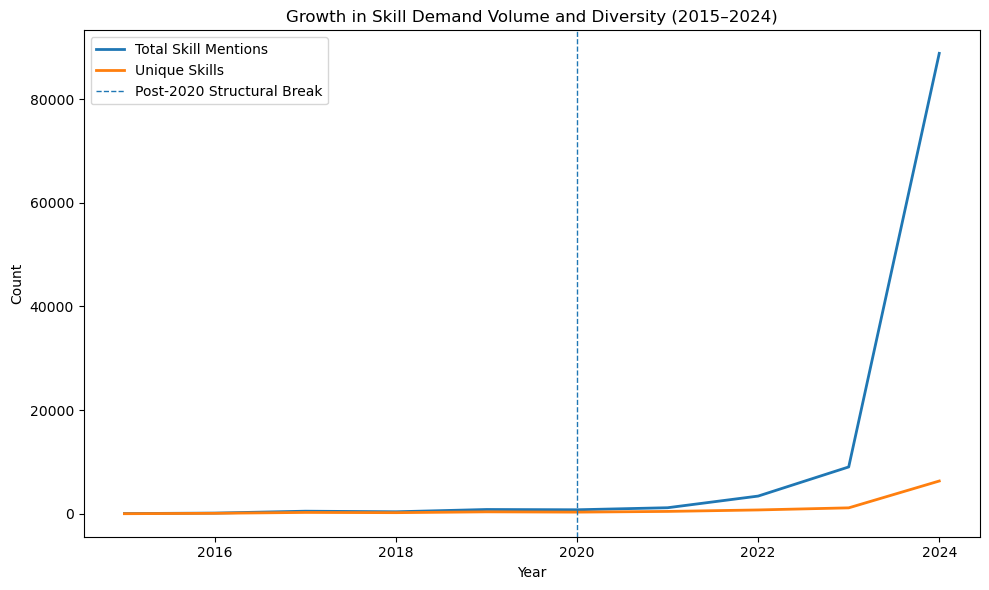

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

plt.plot(
    plot_df["year"],
    plot_df["total_mentions"],
    label="Total Skill Mentions",
    linewidth=2
)

plt.plot(
    plot_df["year"],
    plot_df["unique_skills"],
    label="Unique Skills",
    linewidth=2
)

plt.axvline(
    x=2020,
    linestyle="--",
    linewidth=1,
    label="Post-2020 Structural Break"
)

plt.title("Growth in Skill Demand Volume and Diversity (2015–2024)")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()

plt.show()

In [43]:
core_compare = (
    top_skills_by_period
    .assign(
        in_2015=lambda d: d["period"] == "2015-2019",
        in_2020=lambda d: d["period"] == "2020-2024"
    )
    .groupby("skill")
    .agg(
        in_2015=("in_2015", "any"),
        in_2020=("in_2020", "any")
    )
    .reset_index()
)

core_compare.head()

,skill,in_2015,in_2020
0,agile,False,True
1,analysis,True,False
2,analyst,True,False
3,analytical,True,True
4,analytics,True,True


In [44]:
core_compare["status"] = np.select(
    [
        core_compare["in_2015"] & core_compare["in_2020"],
        core_compare["in_2015"] & ~core_compare["in_2020"],
        ~core_compare["in_2015"] & core_compare["in_2020"]
    ],
    [
        "persistent",
        "exited",
        "entered"
    ],
    default="other"   # <- clave para que sea string
)

core_compare["status"].value_counts()

status
entered       11
exited        11
persistent     9
Name: count, dtype: int64

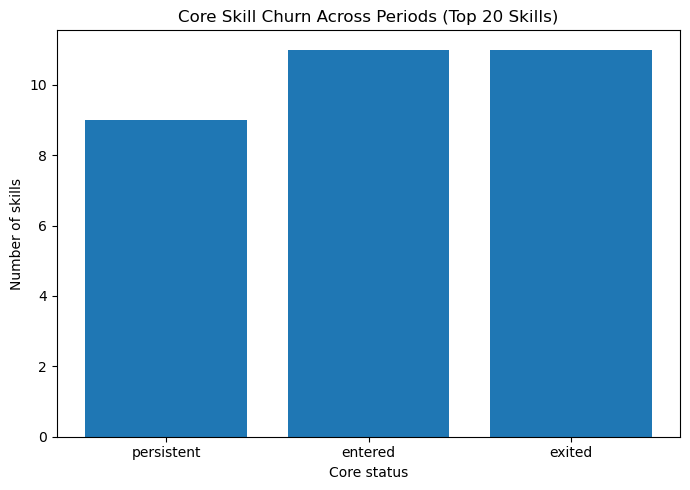

status
persistent     9
entered       11
exited        11
Name: count, dtype: int64

In [45]:
import matplotlib.pyplot as plt

status_counts = (
    core_compare["status"]
    .value_counts()
    .reindex(["persistent", "entered", "exited"])
)

plt.figure(figsize=(7,5))
plt.bar(status_counts.index, status_counts.values)

plt.title("Core Skill Churn Across Periods (Top 20 Skills)")
plt.xlabel("Core status")
plt.ylabel("Number of skills")
plt.tight_layout()
plt.show()

status_counts

### Core Skill Churn

Despite the stability in overall skill concentration, the composition of the core skill set changes substantially after 2020.

Only 9 of the top 20 skills observed in 2015–2019 remain among the top 20 in 2020–2024.  
The remaining 11 skills exit the core, while 11 new skills enter, implying a churn rate of approximately 55 percent.

This result highlights that stability in aggregate demand does not imply continuity in the underlying skill content.

In [46]:
persistence_buckets = skill_years.copy()

persistence_buckets["persistence_group"] = np.select(
    [
        persistence_buckets["active_years"] == 1,
        persistence_buckets["active_years"] == 2,
        persistence_buckets["active_years"] >= 3
    ],
    [
        "1 year",
        "2 years",
        "3+ years"
    ],
    default="other"
)

bucket_counts = (
    persistence_buckets["persistence_group"]
    .value_counts()
    .reindex(["1 year", "2 years", "3+ years"])
)

bucket_counts

persistence_group
1 year      5300
2 years      673
3+ years     788
Name: count, dtype: int64

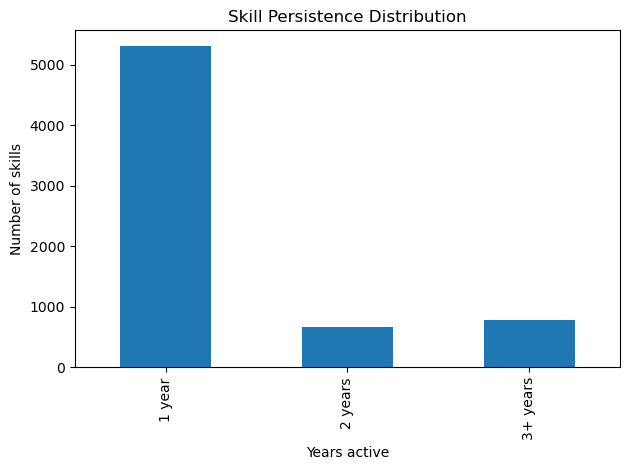

In [47]:
persistence_counts = (
    persistence_buckets["persistence_group"]
    .value_counts()
    .reindex(["1 year", "2 years", "3+ years"])
)

persistence_counts.plot(kind="bar", title="Skill Persistence Distribution")
plt.ylabel("Number of skills")
plt.xlabel("Years active")
plt.tight_layout()
plt.show()

### Interpretation — Skill Persistence

The distribution of skill persistence indicates a highly volatile demand environment.
Most skills appear in job postings for only a single year, while a much smaller subset
remains active across multiple years.

When comparing cohorts, post-2020 skills show substantially lower persistence than
pre-2020 skills, suggesting that recent skill demand is driven by rapid experimentation
and short-lived tool adoption rather than long-term capability accumulation.

In [48]:
import pandas as pd
import numpy as np

# Asegurar period (por si el kernel se reinició)
skills_demand = skills_demand.copy()
skills_demand["period"] = np.where(skills_demand["year"] < 2020, "2015-2019", "2020-2024")

# Conteo por skill y periodo
skill_counts = (
    skills_demand
    .groupby(["period", "skill"])
    .size()
    .rename("count")
    .reset_index()
)

# Share dentro de cada periodo
skill_counts["share"] = (
    skill_counts["count"] /
    skill_counts.groupby("period")["count"].transform("sum")
)

def top_n_share(d, n):
    return d.sort_values("count", ascending=False).head(n)["share"].sum()

summary = (
    skill_counts.groupby("period")
    .apply(lambda d: pd.Series({
        "top_10_share": top_n_share(d, 10),
        "top_20_share": top_n_share(d, 20),
        "n_unique_skills": d["skill"].nunique()
    }))
    .reset_index()
)

summary

C:\Users\riose\AppData\Local\Temp\ipykernel_10676\2214866902.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda d: pd.Series({


,period,top_10_share,top_20_share,n_unique_skills
0,2015-2019,0.167992,0.238569,721.0
1,2020-2024,0.163124,0.248858,6621.0


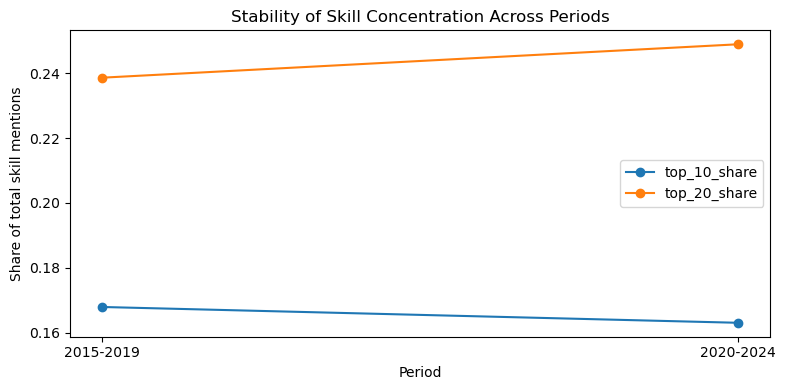

In [49]:
import matplotlib.pyplot as plt

summary_melted = summary.melt(
    id_vars="period",
    value_vars=["top_10_share", "top_20_share"],
    var_name="metric",
    value_name="share"
)

plt.figure(figsize=(8, 4))
for metric in summary_melted["metric"].unique():
    subset = summary_melted[summary_melted["metric"] == metric]
    plt.plot(subset["period"], subset["share"], marker="o", label=metric)

plt.title("Stability of Skill Concentration Across Periods")
plt.ylabel("Share of total skill mentions")
plt.xlabel("Period")
plt.legend()
plt.tight_layout()
plt.show()

In [50]:
import pandas as pd

skills_demand = pd.read_parquet("../data/processed/skills_demand.parquet")

skills_demand.shape, skills_demand.columns

((105320, 3), Index(['jobId', 'year', 'skill'], dtype='object'))

In [51]:
import numpy as np

skills_demand = skills_demand.copy()
skills_demand["period"] = np.where(
    skills_demand["year"] < 2020,
    "2015-2019",
    "2020-2024"
)

skills_demand[["year", "period"]].head()

,year,period
0,2015,2015-2019
1,2015,2015-2019
2,2015,2015-2019
3,2015,2015-2019
4,2015,2015-2019


In [52]:
skills_demand["period"].value_counts()

period
2020-2024    103308
2015-2019      2012
Name: count, dtype: int64

In [53]:
import pandas as pd

top_skills = (
    skills_demand
    .groupby(["period", "skill"])
    .size()
    .rename("count")
    .reset_index()
    .sort_values(["period", "count"], ascending=[True, False])
    .groupby("period")
    .head(20)
)

top_skills.groupby("period").size()

period
2015-2019    20
2020-2024    20
dtype: int64

In [54]:
# Total de menciones por período
total_mentions = (
    skills_demand
    .groupby("period")
    .size()
    .rename("total")
)

# Menciones del core (top 20)
core_mentions = (
    top_skills
    .groupby("period")["count"]
    .sum()
    .rename("core")
)

# Tabla final
long_tail = pd.concat([total_mentions, core_mentions], axis=1)

long_tail["core_share"] = long_tail["core"] / long_tail["total"]
long_tail["long_tail_share"] = 1 - long_tail["core_share"]

long_tail

,total,core,core_share,long_tail_share
period,,,,
2015-2019,2012,480,0.238569,0.761431
2020-2024,103308,25709,0.248858,0.751142


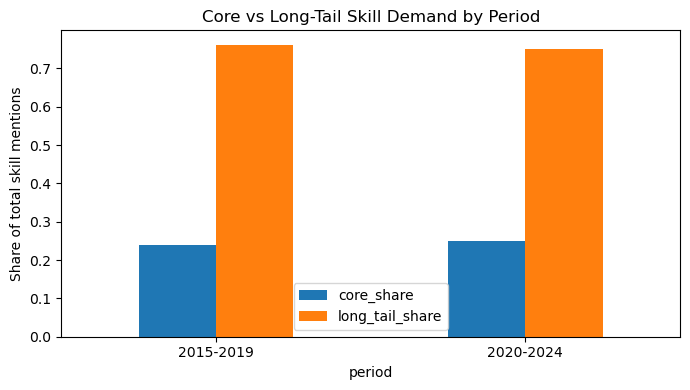

In [55]:
import matplotlib.pyplot as plt

long_tail[["core_share", "long_tail_share"]].plot(
    kind="bar",
    figsize=(7, 4),
    title="Core vs Long-Tail Skill Demand by Period"
)

plt.ylabel("Share of total skill mentions")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [56]:
skill_freq = (
    skills_demand
    .groupby("skill")
    .size()
    .rename("freq")
    .reset_index()
)

skill_freq["freq"].describe()

count    6761.000000
mean       15.577577
std        90.131006
min         1.000000
25%         1.000000
50%         1.000000
75%         4.000000
max      2571.000000
Name: freq, dtype: float64

In [57]:
skill_freq["freq_bucket"] = pd.cut(
    skill_freq["freq"],
    bins=[0, 1, 3, 10, 50, skill_freq["freq"].max()],
    labels=["1", "2–3", "4–10", "11–50", "50+"]
)

bucket_counts = (
    skill_freq["freq_bucket"]
    .value_counts()
    .sort_index()
)

bucket_counts

freq_bucket
1        3478
2–3      1363
4–10      971
11–50     622
50+       327
Name: count, dtype: int64

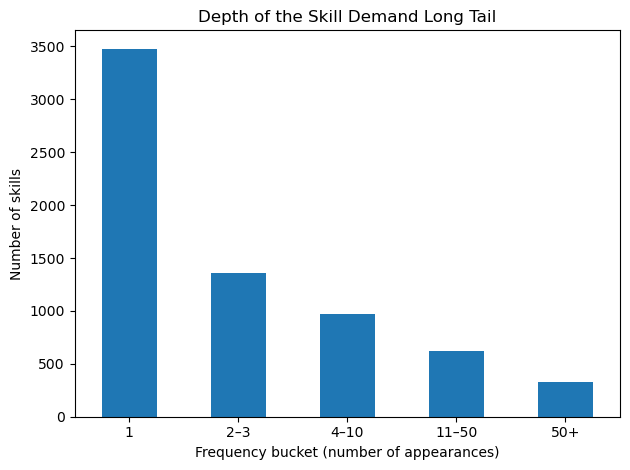

In [58]:
bucket_counts.plot(kind="bar")
plt.title("Depth of the Skill Demand Long Tail")
plt.ylabel("Number of skills")
plt.xlabel("Frequency bucket (number of appearances)")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [59]:
"strategic_skills" in globals(), "strategic_skills_2025_2027" in globals()

(True, False)

In [60]:
strategic_skills.shape, strategic_skills.columns

((5965, 6),
 Index(['skill', 2022, 2023, 2024, 'trajectory', 'scenario_2025_2027'], dtype='object', name='year'))

In [61]:
top_n_by_scenario = {
    "emerging": 10,
    "accelerating": 10,
    "mature": 5,
    "sunsetting": 5,
    "uncertain": 5
}

top_n_by_scenario

{'emerging': 10,
 'accelerating': 10,
 'mature': 5,
 'sunsetting': 5,
 'uncertain': 5}

In [62]:
tables = []

for scenario, n in top_n_by_scenario.items():
    subset = (
        strategic_skills
        [strategic_skills["scenario_2025_2027"] == scenario]
        .sort_values(2024, ascending=False)
        .head(n)
        .assign(scenario=scenario)
    )
    tables.append(subset)

scenario_table = pd.concat(tables, ignore_index=True)

scenario_table.shape, scenario_table.head()

((20, 7),
 year             skill  2022  2023  2024  trajectory scenario_2025_2027  \
 0     azure databricks     0     0   244  spike_2024           emerging   
 1                azure     0     0   244  spike_2024           emerging   
 2           tensorflow     0     0   213  spike_2024           emerging   
 3          data bricks     0     0   192  spike_2024           emerging   
 4              pytorch     0     0   179  spike_2024           emerging   
 
 year  scenario  
 0     emerging  
 1     emerging  
 2     emerging  
 3     emerging  
 4     emerging  )

In [63]:
strategic_skills["scenario_2025_2027"].value_counts()

scenario_2025_2027
emerging        5113
accelerating     852
Name: count, dtype: int64

In [64]:
top_n_by_scenario = {
    "emerging": 10,
    "accelerating": 10
}

tables = []
for scenario, n in top_n_by_scenario.items():
    subset = (
        strategic_skills[strategic_skills["scenario_2025_2027"] == scenario]
        .sort_values(2024, ascending=False)
        .head(n)
    )
    tables.append(subset)

scenario_table = pd.concat(tables, ignore_index=True)

scenario_table.shape, scenario_table.head()

((20, 6),
 year             skill  2022  2023  2024  trajectory scenario_2025_2027
 0     azure databricks     0     0   244  spike_2024           emerging
 1                azure     0     0   244  spike_2024           emerging
 2           tensorflow     0     0   213  spike_2024           emerging
 3          data bricks     0     0   192  spike_2024           emerging
 4              pytorch     0     0   179  spike_2024           emerging)

In [65]:
scenario_table_pub = (
    scenario_table
    .loc[:, ["scenario_2025_2027", "skill", "trajectory", 2022, 2023, 2024]]
    .sort_values(["scenario_2025_2027", 2024], ascending=[True, False])
    .reset_index(drop=True)
)

scenario_table_pub.head(12), scenario_table_pub.tail(12)

(year scenario_2025_2027             skill  trajectory  2022  2023  2024
 0          accelerating            python     growing    26    94  2421
 1          accelerating  machine learning     growing   106   220  2162
 2          accelerating               sql     growing    45   179  2031
 3          accelerating     data analysis     growing    54   171  1817
 4          accelerating        analytical     growing    90   202  1295
 5          accelerating     data modeling     growing    24   120  1059
 6          accelerating         analytics     growing    46   126  1018
 7          accelerating             agile     growing    64   149  1008
 8          accelerating  data engineering     growing    11    35   961
 9          accelerating  computer science     growing    51    87   892
 10             emerging  azure databricks  spike_2024     0     0   244
 11             emerging             azure  spike_2024     0     0   244,
 year scenario_2025_2027                        sk

In [66]:
scenario_order = pd.CategoricalDtype(
    categories=["emerging", "accelerating"],
    ordered=True
)

scenario_table_pub["scenario_2025_2027"] = scenario_table_pub["scenario_2025_2027"].astype(scenario_order)

scenario_table_pub = (
    scenario_table_pub
    .sort_values(["scenario_2025_2027", 2024], ascending=[True, False])
    .reset_index(drop=True)
)

scenario_table_pub.head(12)

year,scenario_2025_2027,skill,trajectory,2022,2023,2024
0,emerging,azure databricks,spike_2024,0,0,244
1,emerging,azure,spike_2024,0,0,244
2,emerging,tensorflow,spike_2024,0,0,213
3,emerging,data bricks,spike_2024,0,0,192
4,emerging,pytorch,spike_2024,0,0,179
5,emerging,airflow,spike_2024,0,0,160
6,emerging,machine learning algorithms,spike_2024,0,0,143
7,emerging,kubernetes,spike_2024,0,0,141
8,emerging,azure data lake,spike_2024,0,0,124
9,emerging,nlp,spike_2024,0,0,119


In [67]:
rationale_map = {
    "spike_2024": "New signal concentrated in 2024 (spike pattern).",
    "growing": "Consistent growth across 2022–2024."
}

scenario_table_final = scenario_table_pub.copy()
scenario_table_final["rationale"] = scenario_table_final["trajectory"].map(rationale_map).fillna("Trajectory-based classification.")

scenario_table_final.head(12)

year,scenario_2025_2027,skill,trajectory,2022,2023,2024,rationale
0,emerging,azure databricks,spike_2024,0,0,244,New signal concentrated in 2024 (spike pattern).
1,emerging,azure,spike_2024,0,0,244,New signal concentrated in 2024 (spike pattern).
2,emerging,tensorflow,spike_2024,0,0,213,New signal concentrated in 2024 (spike pattern).
3,emerging,data bricks,spike_2024,0,0,192,New signal concentrated in 2024 (spike pattern).
4,emerging,pytorch,spike_2024,0,0,179,New signal concentrated in 2024 (spike pattern).
5,emerging,airflow,spike_2024,0,0,160,New signal concentrated in 2024 (spike pattern).
6,emerging,machine learning algorithms,spike_2024,0,0,143,New signal concentrated in 2024 (spike pattern).
7,emerging,kubernetes,spike_2024,0,0,141,New signal concentrated in 2024 (spike pattern).
8,emerging,azure data lake,spike_2024,0,0,124,New signal concentrated in 2024 (spike pattern).
9,emerging,nlp,spike_2024,0,0,119,New signal concentrated in 2024 (spike pattern).


In [68]:
plot_df = (
    scenario_table_final
    .groupby(["scenario_2025_2027", "skill"])[2024]
    .sum()
    .reset_index()
)

plot_df

C:\Users\riose\AppData\Local\Temp\ipykernel_10676\4066173408.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["scenario_2025_2027", "skill"])[2024]


,scenario_2025_2027,skill,2024
0,emerging,agile,0
1,emerging,airflow,160
2,emerging,analytical,0
3,emerging,analytics,0
4,emerging,azure,244
5,emerging,azure data lake,124
6,emerging,azure databricks,244
7,emerging,computer science,0
8,emerging,data analysis,0
9,emerging,data bricks,192


In [69]:
plot_pivot = plot_df.pivot(
    index="scenario_2025_2027",
    columns="skill",
    values=2024
).fillna(0)

plot_pivot

skill,agile,airflow,analytical,analytics,azure,azure data lake,azure databricks,computer science,data analysis,data bricks,data engineering,data modeling,kubernetes,machine learning,machine learning algorithms,nlp,python,pytorch,sql,tensorflow
scenario_2025_2027,,,,,,,,,,,,,,,,,,,,
emerging,0,160,0,0,244,124,244,0,0,192,0,0,141,0,143,119,0,179,0,213
accelerating,1008,0,1295,1018,0,0,0,892,1817,0,961,1059,0,2162,0,0,2421,0,2031,0


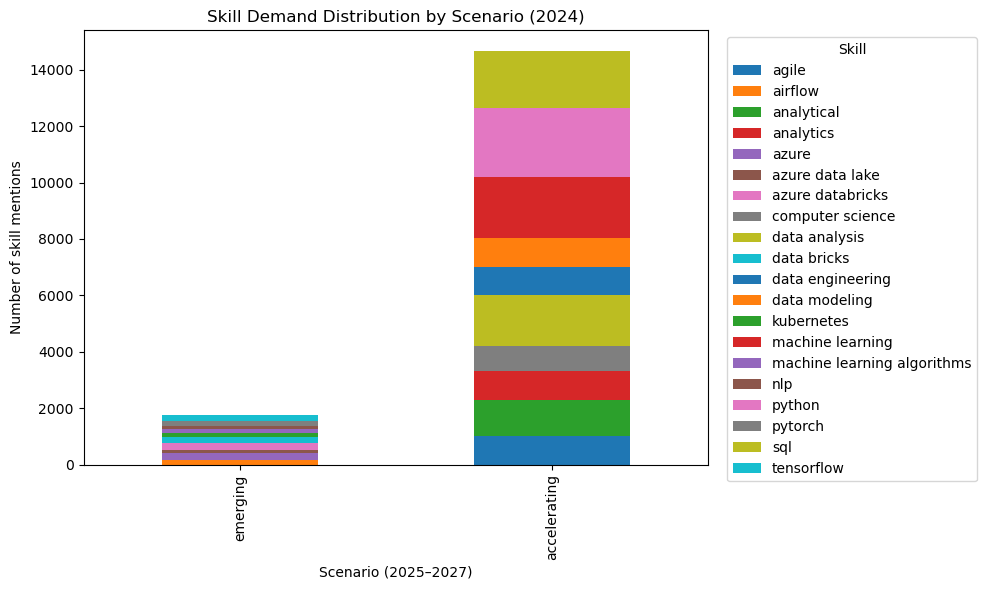

In [70]:
import matplotlib.pyplot as plt

ax = plot_pivot.plot(
    kind="bar",
    stacked=True,
    figsize=(10, 6)
)

ax.set_title("Skill Demand Distribution by Scenario (2024)")
ax.set_xlabel("Scenario (2025–2027)")
ax.set_ylabel("Number of skill mentions")
ax.legend(
    title="Skill",
    bbox_to_anchor=(1.02, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

In [71]:
import pandas as pd

table_source = trend_pivot.copy()

# Top-N target
top_n_by_scenario = {
    "emerging": 10,
    "accelerating": 10,
    "mature": 5,
    "sunsetting": 5,
    "uncertain": 5,
}

# Reality check
scenario_counts = table_source["scenario_2025_2027"].value_counts()
display(scenario_counts)

# rank metric (2022–2024)
table_source["sum_22_24"] = table_source[[2022, 2023, 2024]].sum(axis=1)

# build table, but never exceed what exists
tables = []
for scenario, n in top_n_by_scenario.items():
    subset = table_source[table_source["scenario_2025_2027"] == scenario].copy()
    if subset.empty:
        continue
    tables.append(subset.sort_values("sum_22_24", ascending=False).head(min(n, len(subset))))

scenario_table = pd.concat(tables, ignore_index=True)

# rationale
rationale_map = {
    "spike_2024": "New signal concentrated in 2024 (spike pattern).",
    "growing": "Consistent growth across 2022–2024.",
    "stable": "Stable demand across 2022–2024.",
    "declining": "Declining demand across 2022–2024.",
    "other": "Mixed or volatile pattern across 2022–2024.",
}

scenario_table_final = scenario_table.loc[:, ["scenario_2025_2027", "skill", "trajectory", 2022, 2023, 2024, "sum_22_24"]].copy()
scenario_table_final["rationale"] = scenario_table_final["trajectory"].map(rationale_map).fillna("Trajectory-based classification.")

# ordering
scenario_order = ["emerging", "accelerating", "mature", "sunsetting", "uncertain"]
scenario_dtype = pd.CategoricalDtype(categories=scenario_order, ordered=True)
scenario_table_final["scenario_2025_2027"] = scenario_table_final["scenario_2025_2027"].astype(scenario_dtype)

scenario_table_final = (
    scenario_table_final
    .sort_values(["scenario_2025_2027", "sum_22_24"], ascending=[True, False])
    .reset_index(drop=True)
)

scenario_table_final, scenario_table_final.shape

scenario_2025_2027
emerging        5113
accelerating     852
uncertain        505
sunsetting         9
mature             7
Name: count, dtype: int64

(year scenario_2025_2027                        skill  trajectory  2022  2023  \
 0              emerging             azure databricks  spike_2024     0     0   
 1              emerging                        azure  spike_2024     0     0   
 2              emerging                   tensorflow  spike_2024     0     0   
 3              emerging                  data bricks  spike_2024     0     0   
 4              emerging                      pytorch  spike_2024     0     0   
 5              emerging                      airflow  spike_2024     0     0   
 6              emerging  machine learning algorithms  spike_2024     0     0   
 7              emerging                   kubernetes  spike_2024     0     0   
 8              emerging              azure data lake  spike_2024     0     0   
 9              emerging                          nlp  spike_2024     0     0   
 10         accelerating                       python     growing    26    94   
 11         accelerating    

In [72]:
scenario_table_final["scenario_2025_2027"].value_counts()

scenario_2025_2027
emerging        10
accelerating    10
mature           5
sunsetting       5
uncertain        5
Name: count, dtype: int64

In [73]:
from pathlib import Path
import pandas as pd

# Tu carpeta del proyecto (ajustado a lo que me dijiste)
PROJECT_ROOT = Path(r"C:\Users\riose\Desktop\C1 Project")
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

# Carga directa del parquet final
df = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")

# Asegurar nombres para PostgreSQL
df = df[["jobId", "year", "skill"]].copy()
df.columns = ["job_id", "year", "skill"]

# Exportar CSV (lo dejo en data/processed)
out_csv = DATA_PROCESSED / "skill_mentions.csv"
df.to_csv(out_csv, index=False)

out_csv

WindowsPath('C:/Users/riose/Desktop/C1 Project/data/processed/skill_mentions.csv')

In [74]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path(r"C:\Users\riose\Desktop\C1 Project")
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

df = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")

df = df[["jobId", "year", "skill"]].copy()
df = df.dropna(subset=["skill"])          # <-- clave
df.columns = ["job_id", "year", "skill"]

out_csv = DATA_PROCESSED / "skill_mentions.csv"
df.to_csv(out_csv, index=False)

df.shape

(105320, 3)

In [75]:
df = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")
df = df[["jobId", "year", "skill"]].copy()
df = df.dropna(subset=["skill"])          # ESTO ES LO CLAVE
df.columns = ["job_id", "year", "skill"]
df.to_csv(DATA_PROCESSED / "skill_mentions.csv", index=False)

df.isna().sum()

job_id    0
year      0
skill     0
dtype: int64

In [77]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path(r"C:\Users\riose\Desktop\C1 Project")
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

# volver a cargar desde la fuente real
df = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")

df.shape, df.head()

((105320, 3),
           jobId  year              skill
 0   10615503452  2015     data scientist
 1  100915500152  2015  analytical skills
 2  100915500152  2015            bidding
 3  100915500152  2015   business analyst
 4  100915500152  2015            english)

In [78]:
df_export = df[["jobId","year","skill"]].copy()
df_export["jobId"] = df_export["jobId"].astype(str)

out = DATA_PROCESSED / "skill_mentions.csv"
df_export.to_csv(out, index=False)

out

WindowsPath('C:/Users/riose/Desktop/C1 Project/data/processed/skill_mentions.csv')

In [79]:
from pathlib import Path
import pandas as pd

PROJECT_ROOT = Path(r"C:\Users\riose\Desktop\C1 Project")
DATA_PROCESSED = PROJECT_ROOT / "data" / "processed"

df = pd.read_parquet(DATA_PROCESSED / "skills_demand.parquet")[["jobId","year","skill"]].copy()

total_rows = len(df)

invalid_mask = (
    df["skill"].isna() |
    (df["skill"].astype(str).str.strip() == "") |
    (df["skill"].astype(str).str.lower() == "nan")
)

invalid_rows = invalid_mask.sum()
valid_rows = total_rows - invalid_rows

total_rows, invalid_rows, valid_rows

(105320, np.int64(62), np.int64(105258))

In [80]:
df_clean = df.loc[~invalid_mask].copy()

# blindajes
df_clean["jobId"] = df_clean["jobId"].astype(str)
df_clean["skill"] = df_clean["skill"].astype(str).str.strip()

df_clean.shape

(105258, 3)

In [81]:
out = DATA_PROCESSED / "skill_mentions_clean.csv"
df_clean.rename(columns={"jobId":"job_id"}, inplace=True)
df_clean.to_csv(out, index=False)

out

WindowsPath('C:/Users/riose/Desktop/C1 Project/data/processed/skill_mentions_clean.csv')